In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class OutputEntity:
    def __init__(self, name_function: str, result_x: float, result_y: float, count_iter: int, epsilon: float):
        self.name_function = name_function
        self.result_x = result_x
        self.result_y = result_y
        self.count_iter = count_iter
        self.epsilon = epsilon

    def __str__(self):
        return (
            f"\nФункция:\t{self.name_function}\n"
            f"Позиция точки:\t{self.result_x}\n"
            f"Значение функции в точке:\t{self.result_y}\n"
            f"Количество итераций:\t{self.count_iter}\n"
            f"Погрешность:\t{self.epsilon}\n"
        )

In [3]:
def f(x: float, deriv_s: int = 0):
    """
    Функция y = 1/7 * x^7 - x^3 + 1/2 x^2 - x

    При вводе аргумента deriv_s можно выбрать степень производной

    :param x: Точка
    :param deriv_s: Степень производной

    :return: Значение функции в точке x
    :rtype: float

    """
    if deriv_s == 1:
        return pow(x, 6) - 3 * pow(x, 2) + x - 1
    elif deriv_s == 2:
        return 6 * pow(x, 5) - 6 * x + 1
    return 1 / 7 * pow(x, 7) - pow(x, 3) + 1 / 2 * pow(x, 2) - x


def gold_shower(x_mass: list[float, float], eps: float) -> OutputEntity:
    left, right = x_mass[0], x_mass[1]

    counter = 2
    while (right - left) >= eps:
        x1 = left + (right - left) * (3 - np.sqrt(5)) / 2
        x2 = left + (right - left) * (np.sqrt(5) - 1) / 2
        f1, f2 = f(x1), f(x2)
        counter += 1

        if f1 < f2:
            right = x2
        elif f1 > f2:
            left = x1
        else:
            left, right = x1, x2

    endpoint = (left + right) / 2
    return OutputEntity("Золотое сечение", endpoint, f(endpoint), counter, eps)


def dichotomy(x_mass: list[float, float], eps: float) -> OutputEntity:
    left, right = x_mass[0], x_mass[1]
    delta = eps / 2
    counter = 0
    while (right - left) >= eps:
        x1, x2 = (left + right - delta) / 2, (left + right + delta) / 2
        f1, f2 = f(left), f(right)
        counter += 2

        if f1 < f2:
            right = x2
        elif f1 > f2:
            left = x1
        else:
            left, right = x1, x2

    endpoint = (left + right) / 2
    return OutputEntity("Дихотомия", endpoint, f(endpoint), counter, eps)


In [4]:
x_mass = [1., 1.5]
epsilon = 0.05
res_gs = gold_shower(x_mass, epsilon)
res_ds = dichotomy(x_mass, epsilon)
print(res_gs, res_ds)


Функция:	Золотое сечение
Позиция точки:	1.2864745084375788
Значение функции в точке:	-1.754977753148566
Количество итераций:	7
Погрешность:	0.05
 
Функция:	Дихотомия
Позиция точки:	1.242578125
Значение функции в точке:	-1.7357359604590117
Количество итераций:	10
Погрешность:	0.05



In [5]:
mass_epsilon, res_ds, res_gs = [], [], []

for eps in np.arange(0.0001, 0.1, 0.000001):
    mass_epsilon.append(np.log(eps))
    res_ds.append(dichotomy(x_mass, eps).count_iter)
    res_gs.append(gold_shower(x_mass, eps).count_iter)

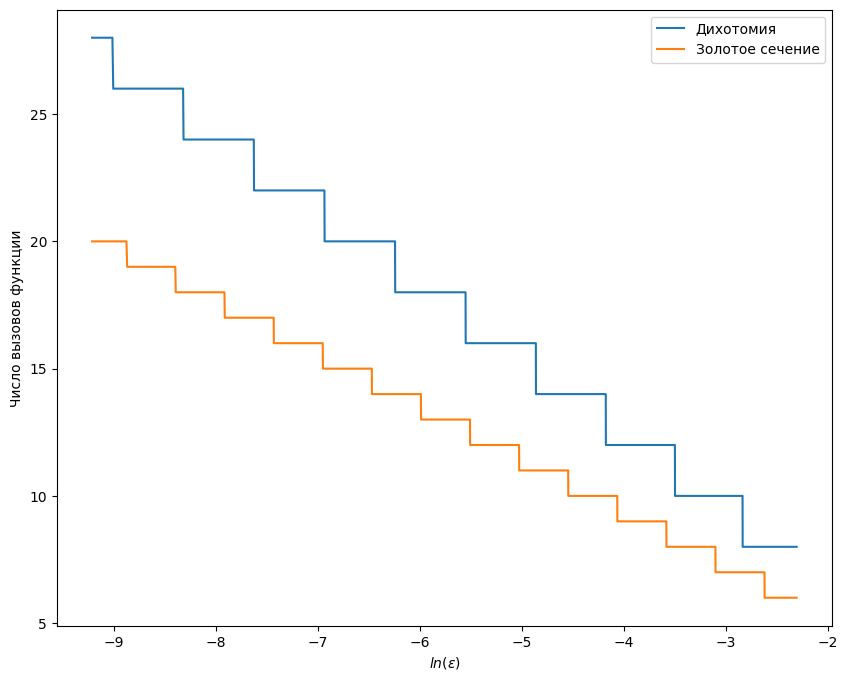

In [6]:
plt.figure(figsize=(10, 8))

plt.plot(mass_epsilon, res_ds, label="Дихотомия")
plt.plot(mass_epsilon, res_gs, label="Золотое сечение")

plt.xlabel('$ln(\epsilon)$')
plt.ylabel('Число вызовов функции')

plt.legend()

plt.savefig('graph.png', dpi=300)
plt.show()